In [1]:
from statistical_analysis import load_data, create_csv, prepare_data_frame, test_normality, fisher_z_transform, statistical_testing, visualize_results, linear_regression_analysis
from topographical_analysis import visualize_connectivity

In [4]:
import pyreadstat

# read the .sav file
questionnaire_data, meta = pyreadstat.read_sav("/home/agata/Desktop/thesis/results/BrainsInSync_Qualtrics_June8-2022_FINAL.sav")
display(questionnaire_data.head())

# IDs of participants in the neural synchrony dataset
ids = ['T029', 'T035', 'T036', 'T049', 'T050', 'T056', 'T122', 'T137', 'T188', 'T212', 'T262', 'T287', 'T290', 'T351', 'T389', 'T435', 'T475', 'T477', 'T484', 'T487', 'T520', 'T551', 'T563', 'T576', 'T596', 'T600', 'T623', 'T637', 'T655', 'T682', 'T684', 'T775', 'T802', 'T815', 'T882', 'T892', 'T899', 'T916', 'T917', 'T997']

# IDs of participants from the qualtrics survey
questionnaire_data_ids = list(questionnaire_data['ID'])
excluded_participants = ['T475', 'T563', 'T623', 'T802', 'T899', 'T916', 'T917']

# list of participant IDs to exclude because of missing data
exclude_ids = [i for i in questionnaire_data_ids if i not in ids or i in excluded_participants]

# exclude rows with the specified IDs
questionnaire_data = questionnaire_data[~questionnaire_data['ID'].isin(exclude_ids)]

questionnaire_data.to_csv('/home/agata/Desktop/thesis/results/BrainsInSync_Questionnaire_Data.csv')

,ID,RecordedDate,Date_EEG,Age_child_EEG_Days,Age_child_EEG_Months,Birthdate_child,Sex_Infant,GA_atbirth_1,GA_atbirth_2,Type_Birth,...,PBQ_Sum,PBQ_General_Mean,PBQ_General_Sum,PBQ_AngerRejection_Mean,PBQ_AngerRejection_Sum,PBQ_ConfidenceAnx_Mean,PBQ_ConfidenceAnx_Sum,PBQ_AgressionBaby_Mean,PBQ_AgressionBaby_Sum,Opmerkingen_overig
0,T802,2021-04-14 10:10:45,2021-04-23,417.0,13.0,2020-03-02,1.0,38,2,1.0,...,4.0,0.166667,2.0,0.142857,1.0,0.25,1.0,0.0,0.0,
1,T563,2021-04-28 19:19:05,2021-04-29,327.0,10.0,2020-06-06,1.0,39,4,1.0,...,0.0,0.000000,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,
2,T029,2021-04-28 22:56:12,2021-05-19,370.0,12.0,2020-05-14,1.0,39,6,1.0,...,31.0,1.500000,18.0,1.285714,9.0,1.00,4.0,0.0,0.0,
3,T035,2021-05-10 20:11:42,2021-05-12,357.0,11.0,2020-05-20,1.0,38,4,1.0,...,6.0,0.250000,3.0,0.000000,0.0,0.75,3.0,0.0,0.0,
4,T775,2021-05-12 18:47:39,2021-05-21,233.0,7.0,2020-09-30,2.0,39,6,1.0,...,4.0,0.250000,3.0,0.000000,0.0,0.25,1.0,0.0,0.0,


# Alpha PLV

Test statistic: 0.9631109237670898
p-value =  0.00022770768555346876 -> data is non-normally distributed
Test statistic: 0.956810474395752
p-value =  5.555658935918473e-05 -> data is non-normally distributed
Main effect
             Source         W  ddof1         Q     p-unc
Friedman  Condition  0.024059      4  3.175758  0.528855
Post-hoc test result: 

            FreePlay1  StillFace1  FreePlay2  StillFace2   Reunion
FreePlay1    1.000000    0.423808   0.423808    0.423808  0.876414
StillFace1   0.423808    1.000000   0.876414    0.876414  0.843868
FreePlay2    0.423808    0.876414   1.000000    0.903071  0.903071
StillFace2   0.423808    0.876414   0.903071    1.000000  0.903071
Reunion      0.876414    0.843868   0.903071    0.903071  1.000000


Z-values:

[[   0. -182. -190. -193. -237.]
 [ 182.    0. -246. -249. -224.]
 [ 190.  246.    0. -270. -265.]
 [ 193.  249.  270.    0. -265.]
 [ 237.  224.  265.  265.    0.]]
Plot saved to: /home/agata/Desktop/thesis/results/alpha_resul

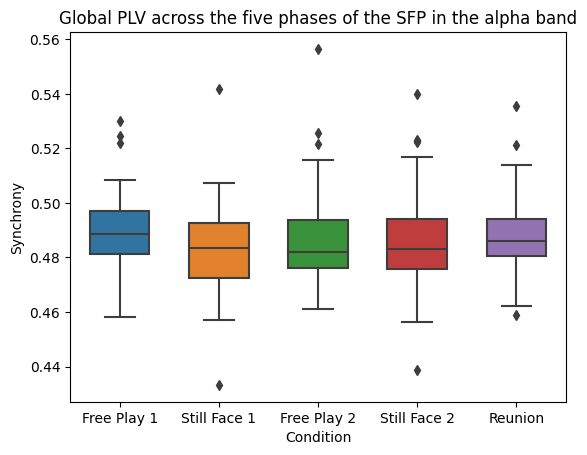

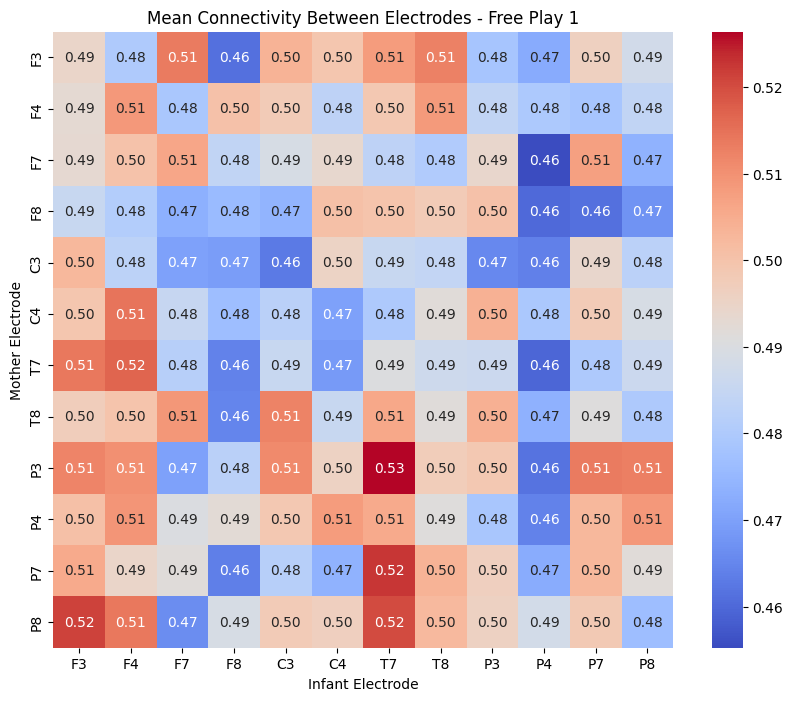

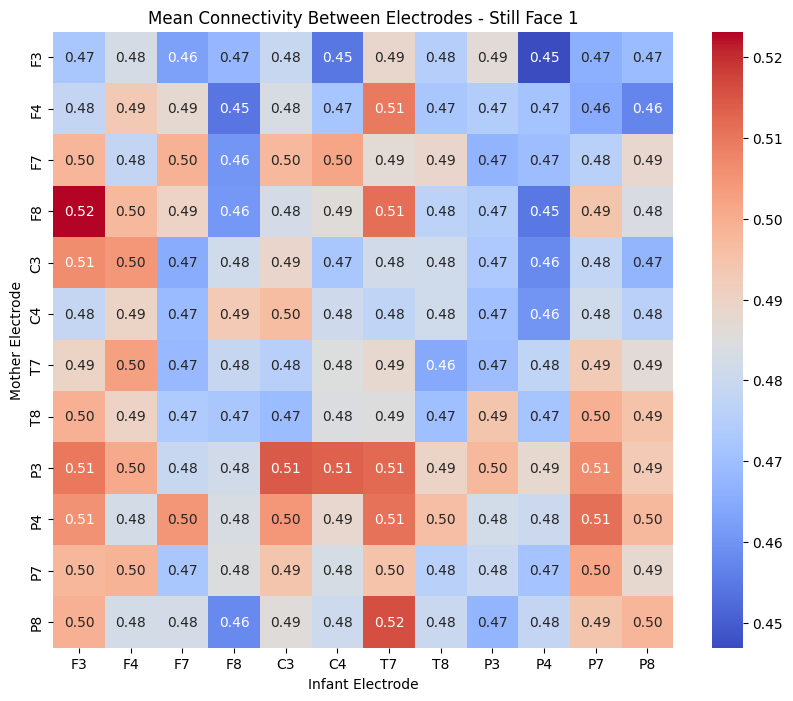

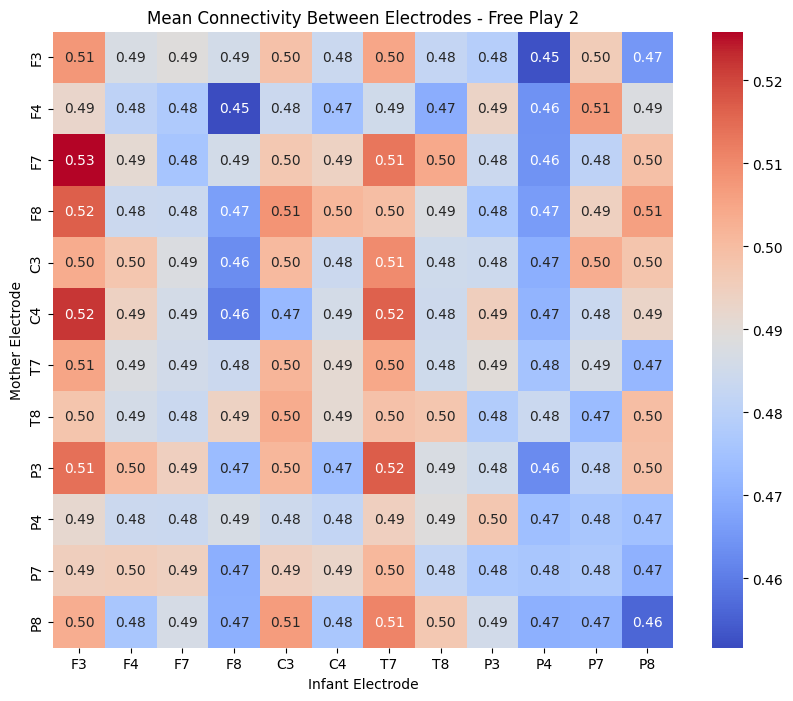

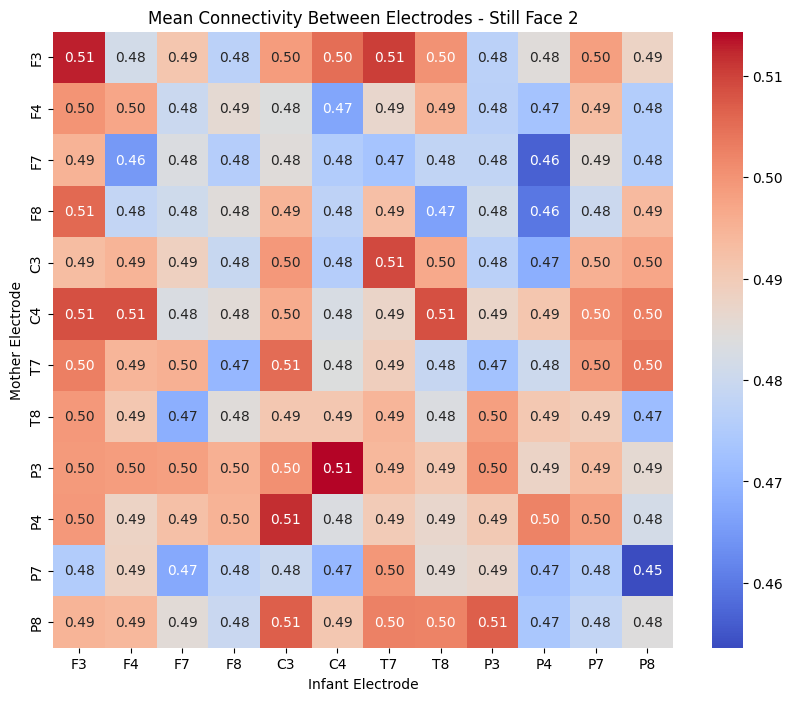

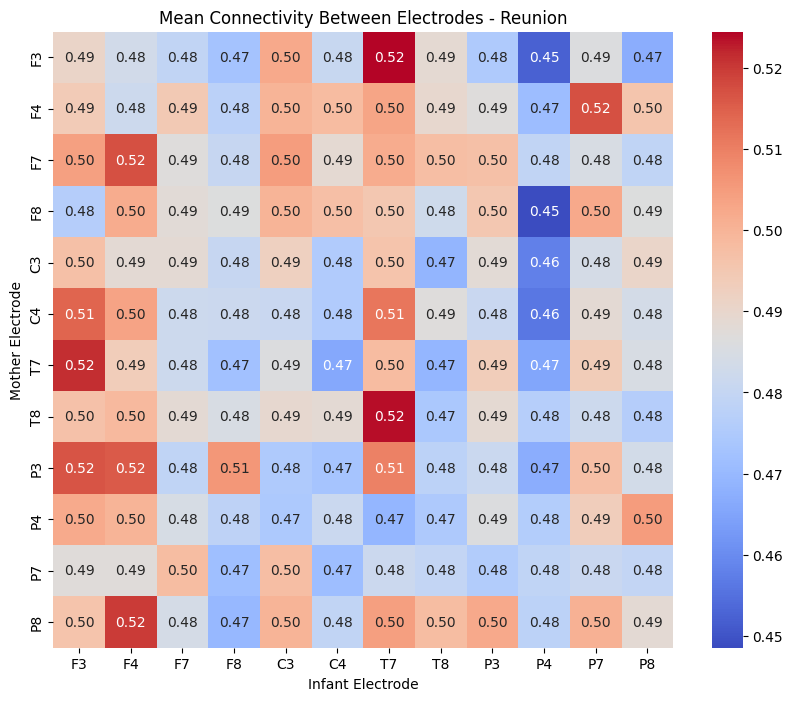

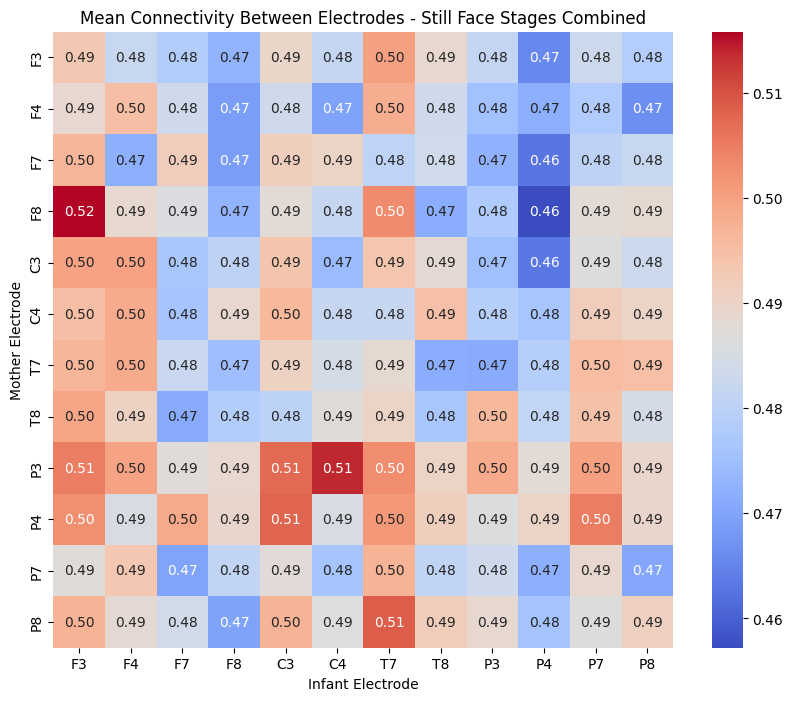

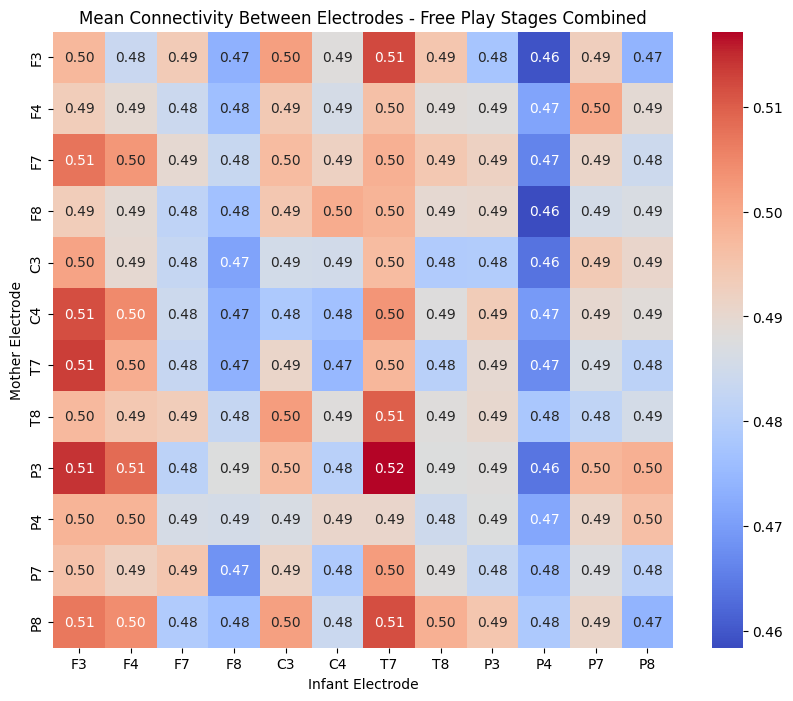

Free Play 1
Not setting metadata
116 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
116 matching events found
No baseline correction applied
0 projection items activated


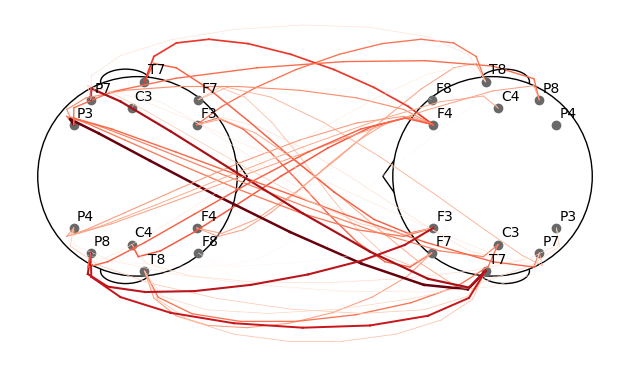

Still Face 1
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated


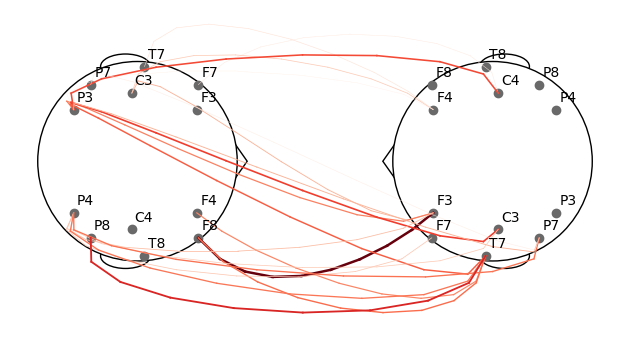

Free Play 2
Not setting metadata
116 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
116 matching events found
No baseline correction applied
0 projection items activated


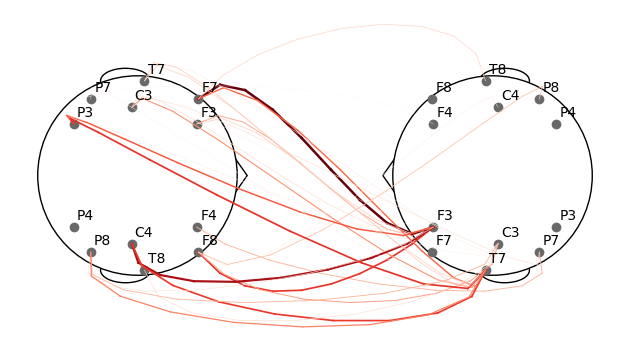

Still Face 2
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated


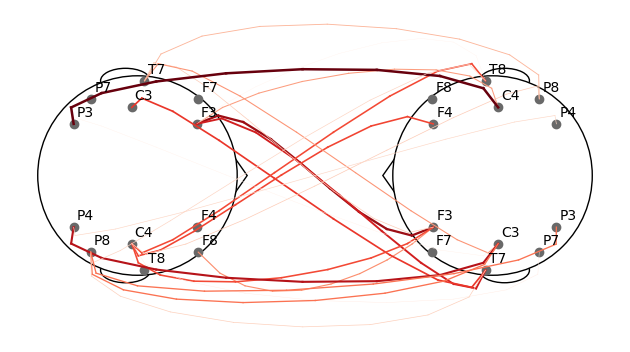

Reunion
Not setting metadata
118 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
118 matching events found
No baseline correction applied
0 projection items activated


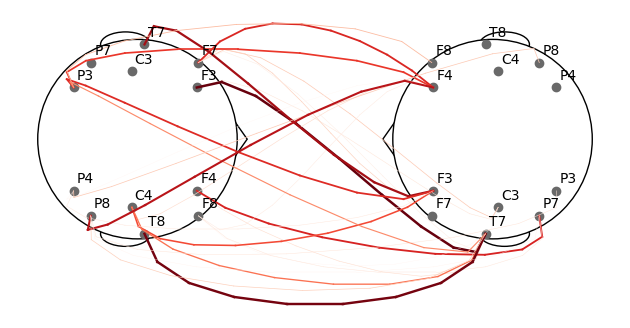

Free Play Combined
Not setting metadata
116 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
116 matching events found
No baseline correction applied
0 projection items activated


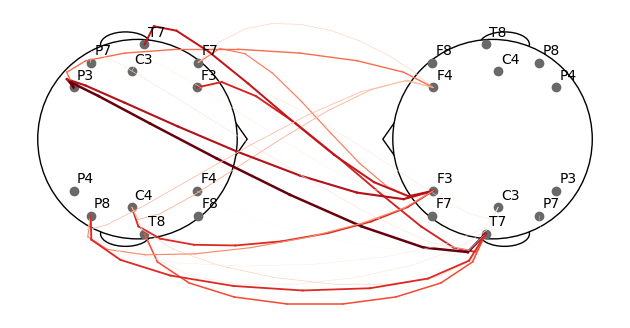

Still Face Combined
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated


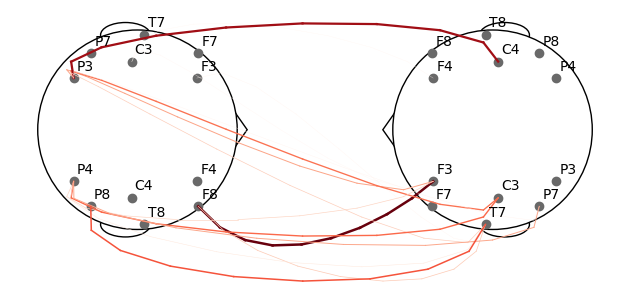

[5.108143684822925, 1.7645542651957087, 1.7751809775262448, 1.0271110190723]
[1.         0.87358953 0.32136114 0.02117229]


/home/agata/Desktop/thesis/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


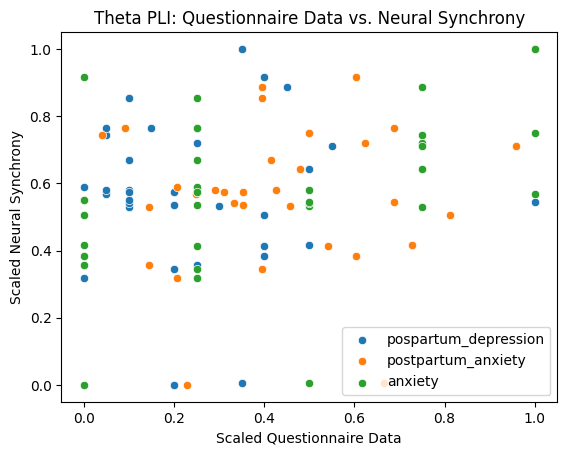

In [3]:
participant_indices_alpha_plv, data_array_alpha_plv = load_data('/home/agata/Desktop/thesis/results/validated_results_alpha_plv.json')
create_csv(data_array_alpha_plv, participant_indices_alpha_plv, "validated_data_alpha_plv.csv", '/home/agata/Desktop/thesis/results')
df_melted_alpha_plv = prepare_data_frame(data_array_alpha_plv)
test_normality(df_melted_alpha_plv)
fisher_z_transform(data_array_alpha_plv)
statistical_testing(df_melted_alpha_plv)
visualize_results(df_melted_alpha_plv, 
                  frequency='alpha',
                  method = 'PLV',
                  x_col_label='Condition', 
                  y_col_label='Synchrony',
                  title='across the five phases of the SFP',
                  x_tick_labels=['Free Play 1', 'Still Face 1', 'Free Play 2', 'Still Face 2', 'Reunion'],
                  save_filename="alpha_results_plv.png",
                  save_folder='/home/agata/Desktop/thesis/results')
visualize_connectivity(results_path="/home/agata/Desktop/thesis/results/validated_results_alpha_plv.json", 
                       mom_epochs_path="/home/agata/Desktop/thesis/results/moms_epochs_averaged.pkl", 
                       baby_epochs_path="/home/agata/Desktop/thesis/results/baby_epochs_averaged.pkl", 
                       ch_names=['F3', 'F4', 'F7', 'F8', 'C3', 'C4', 'T7', 'T8', 'P3', 'P4', 'P7', 'P8'],
                       sfreq=250,
                       threshold=0.5)
linear_regression_analysis("BrainsInSync_Qualtrics_June8-2022_FINAL.sav", '/home/agata/Desktop/thesis/results/validated_data_alpha_plv.csv')

# Theta PLV

In [ ]:
participant_indices_theta_plv, data_array_theta_plv = load_data('/home/agata/Desktop/thesis/results/validated_results_theta_plv.json')
create_csv(data_array_theta_plv, participant_indices_theta_plv, "validated_data_theta_plv.csv", '/home/agata/Desktop/thesis/results')
df_melted_theta_plv = prepare_data_frame(data_array_theta_plv)
test_normality(df_melted_theta_plv)
fisher_z_transform(data_array_theta_plv)
statistical_testing(df_melted_theta_plv)
visualize_results(df_melted_theta_plv, 
                  frequency='theta',
                  method='PLV',
                  x_col_label='Condition', 
                  y_col_label='Synchrony',
                  title='across the five phases of the SFP',
                  x_tick_labels=['Free Play 1', 'Still Face 1', 'Free Play 2', 'Still Face 2', 'Reunion'],
                  save_filename="theta_results_plv.png",
                  save_folder='/home/agata/Desktop/thesis/results')
visualize_connectivity(results_path="/home/agata/Desktop/thesis/results/validated_results_theta_plv.json", 
                       mom_epochs_path="/home/agata/Desktop/thesis/results/moms_epochs_averaged.pkl", 
                       baby_epochs_path="/home/agata/Desktop/thesis/results/baby_epochs_averaged.pkl", 
                       ch_names=['F3', 'F4', 'F7', 'F8', 'C3', 'C4', 'T7', 'T8', 'P3', 'P4', 'P7', 'P8'],
                       sfreq=250,
                       threshold=0.56)
linear_regression_analysis("BrainsInSync_Qualtrics_June8-2022_FINAL.sav", '/home/agata/Desktop/thesis/results/validated_data_theta_plv.csv')

# Alpha PLI

In [ ]:
participant_indices_alpha_pli, data_array_alpha_pli = load_data("/home/agata/Desktop/thesis/results/validated_results_alpha_pli.json")
create_csv(data_array_alpha_pli, participant_indices_alpha_pli, "validated_data_alpha_pli.csv", '/home/agata/Desktop/thesis/results')
df_melted_alpha_pli = prepare_data_frame(data_array_alpha_pli)
test_normality(df_melted_alpha_pli)
fisher_z_transform(data_array_alpha_pli)
statistical_testing(df_melted_alpha_pli)
visualize_results(df_melted_alpha_pli, 
                  frequency='alpha',
                  method = 'PLI',
                  x_col_label='Condition', 
                  y_col_label='Synchrony',
                  title='across the five phases of the SFP',
                  x_tick_labels=['Free Play 1', 'Still Face 1', 'Free Play 2', 'Still Face 2', 'Reunion'],
                  save_filename="alpha_results_pli.png",
                  save_folder='/home/agata/Desktop/thesis/results')
visualize_connectivity(results_path="/home/agata/Desktop/thesis/results/validated_results_alpha_pli.json",
                       mom_epochs_path="/home/agata/Desktop/thesis/results/moms_epochs_averaged.pkl", 
                       baby_epochs_path="/home/agata/Desktop/thesis/results/baby_epochs_averaged.pkl", 
                       ch_names=['F3', 'F4', 'F7', 'F8', 'C3', 'C4', 'T7', 'T8', 'P3', 'P4', 'P7', 'P8'],
                       sfreq=250,
                       threshold=0.22)
linear_regression_analysis("BrainsInSync_Qualtrics_June8-2022_FINAL.sav", '/home/agata/Desktop/thesis/results/validated_data_alpha_pli.csv')

# Theta PLI

In [ ]:
participant_indices_theta_pli, data_array_theta_pli = load_data("/home/agata/Desktop/thesis/results/validated_results_theta_pli.json")
create_csv(data_array_theta_pli, participant_indices_theta_pli, "validated_data_theta_pli.csv", '/home/agata/Desktop/thesis/results')
df_melted_theta_pli = prepare_data_frame(data_array_theta_pli)
test_normality(df_melted_theta_pli)
fisher_z_transform(data_array_theta_pli)
statistical_testing(df_melted_theta_pli)
visualize_results(df_melted_theta_pli, 
                  frequency='theta',
                  method='PLI',
                  x_col_label='Condition', 
                  y_col_label='Synchrony',
                  title='across the five phases of the SFP',
                  x_tick_labels=['Free Play 1', 'Still Face 1', 'Free Play 2', 'Still Face 2', 'Reunion'],
                  save_filename="theta_results_pli.png",
                  save_folder='/home/agata/Desktop/thesis/results')
visualize_connectivity(results_path="/home/agata/Desktop/thesis/results/validated_results_theta_pli.json", 
                       mom_epochs_path="/home/agata/Desktop/thesis/results/moms_epochs_averaged.pkl", 
                       baby_epochs_path="/home/agata/Desktop/thesis/results/baby_epochs_averaged.pkl", 
                       ch_names=['F3', 'F4', 'F7', 'F8', 'C3', 'C4', 'T7', 'T8', 'P3', 'P4', 'P7', 'P8'], 
                       sfreq=250,
                       threshold=0.25)
linear_regression_analysis("BrainsInSync_Qualtrics_June8-2022_FINAL.sav", '/home/agata/Desktop/thesis/results/validated_data_theta_pli.csv')

# Alpha wPLI

In [ ]:
participant_indices_alpha_wpli, data_array_alpha_wpli = load_data("/home/agata/Desktop/thesis/results/validated_results_alpha_wpli.json")
create_csv(data_array_alpha_wpli, participant_indices_alpha_wpli, "validated_data_alpha_wpli.csv", '/home/agata/Desktop/thesis/results')
df_melted_alpha_wpli = prepare_data_frame(data_array_alpha_wpli)
test_normality(df_melted_alpha_wpli)
fisher_z_transform(data_array_alpha_wpli)
statistical_testing(df_melted_alpha_wpli)
visualize_results(df_melted_alpha_wpli, 
                  frequency='alpha',
                  method = 'wPLI',
                  x_col_label='Condition', 
                  y_col_label='Synchrony',
                  title='across the five phases of the SFP',
                  x_tick_labels=['Free Play 1', 'Still Face 1', 'Free Play 2', 'Still Face 2', 'Reunion'],
                  save_filename="alpha_results_wpli.png",
                  save_folder='/home/agata/Desktop/thesis/results')
linear_regression_analysis("BrainsInSync_Qualtrics_June8-2022_FINAL.sav", '/home/agata/Desktop/thesis/results/validated_data_alpha_wpli.csv')

# Theta wPLI

In [ ]:
participant_indices_theta_wpli, data_array_theta_wpli = load_data("/home/agata/Desktop/thesis/results/validated_results_theta_wpli.json")
create_csv(data_array_theta_wpli, participant_indices_theta_wpli, "validated_data_theta_wpli.csv", '/home/agata/Desktop/thesis/results')
df_melted_theta_wpli = prepare_data_frame(data_array_theta_wpli)
test_normality(df_melted_theta_wpli)
fisher_z_transform(data_array_theta_wpli)
statistical_testing(df_melted_theta_wpli)
visualize_results(df_melted_theta_wpli, 
                  frequency='theta',
                  method='wPLI',
                  x_col_label='Condition', 
                  y_col_label='Synchrony',
                  title='across the five phases of the SFP',
                  x_tick_labels=['Free Play 1', 'Still Face 1', 'Free Play 2', 'Still Face 2', 'Reunion'],
                  save_filename="theta_results_wpli.png",
                  save_folder='/home/agata/Desktop/thesis/results')
linear_regression_analysis("BrainsInSync_Qualtrics_June8-2022_FINAL.sav", '/home/agata/Desktop/thesis/results/validated_data_theta_wpli.csv')